# 2 - Regressão Linear com Múltiplas Variáveis

### Carrega a base ex1data2.txt

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

DATA_BASE = "am-T1-dados"

def load_properties_sell(properties_sell=DATA_BASE):
    os.makedirs(properties_sell, exist_ok=True)
    txt_path = os.path.join(properties_sell, "ex1data2.txt")
    return np.loadtxt(txt_path, delimiter=",")






## 2.1 -  Normalização das características

In [6]:
import numpy as np 

def normalizar_caracteristica(pmtr):
    c = len(pmtr[0])
    l = len(pmtr)
    mean = np.zeros(shape=(c), dtype=np.float64)
    std = np.zeros(shape=(c), dtype=np.float64)
    normalizar = np.copy(pmtr)

    for j in range(c):
        mean[j] = np.mean(pmtr[:,j])
        std[j] = pmtr[:,j].std()

    for i in range(l):
        for j in range(c):
            normalizar[i,j] = ((pmtr[i,j] - mean[j]) / std[j])

    return normalizar, mean , std

#### Essa função recebe a matriz de dados X de dados como parâmetro (na forma de um numpy array). Essa função realiza dois passos principais:
#### 1 - subtrai o valor médio de todas as características do conjunto de dados pmtr.
#### 2 - após subtrair a média, divide cada característica pelo seu respectivo desvio padrão.
####  Normalizacao é uma pratica para evitar que o algoritmo fique enviesado para as variáveis com maior ordem de grandeza. Utiliza  na função normalizar_caracteristica z score normalization. O resultado dessa normalização vai fazer com quas as variáveis tenham uma média proxima a 0 e um desvio padrão proximo a 1.

# 2.2 - Gradiente descendente

#### No gradiente descendente de multiplas variavéis é preciso lidar com os multiplos valores de theta. Antes era apenas dois e agora se tem 3  valores por padrão o theta 0 é uma constante , entretando ainda existe as outras váriaveis.Nessa caso primeiro precisa se ter a formula 
![text](img/grad_multi.png)

#### Sendo a hipothesi o theta transposta x
![text](img/hipothesi_m.png)
### ->  x.dot(theta)



In [31]:

import numpy as np


def gd_reglin_multi(x, y, learning_rate, iterations):
    theta = np.zeros((3, 1)) 
    m = len(y)
    count = 0
    new_custo = 0
    historico_custo = np.zeros((iterations, 1))

    while True:
        theta = theta - learning_rate * (1./m) * np.transpose(x).dot(x.dot(theta) - np.transpose([y]))
        new_custo = custo_regrlin_multi(theta, x[0], y)
        historico_custo[count] = new_custo
        count += 1
        if(count > (iterations-1)):
            break
    return theta,historico_custo


### A função de custo é semelhante, mas agora o theta representa um np.array com multiplos thetas 

In [27]:
import numpy as np
import plot_ex1data1 as pe
import utils_ml as um
import math


def custo_regrlin_multi(theta, x, y):
    m = len(x)
    sm = np.power(x.dot(theta) - np.transpose([y]), 2)
    J = (1.0/(2*m)) * sm.sum( axis = 0 )
    return J

#### Algo que é importante observar que o xs corresponde a 2 colunas representando theta1 e theta2, entretanto ainda existe o theta 0 . Como o theta0  é uma constante precisa então iniciar esta coluna com uns : 
### X_norm = np.column_stack((np.ones((m,1)), X_norm))


Text(0, 0.5, 'Custo J')

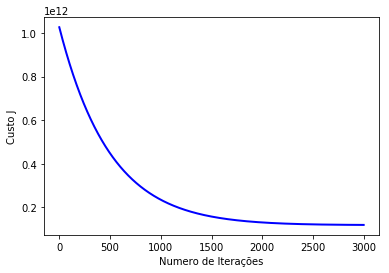

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import plot_ex1data2 as pe
import gd_reglin_multi as gm
import normalizacao as na

properties_sell = load_properties_sell()
learning_rate = 0.001

X_s = properties_sell[:,:2]
y = properties_sell[:,2]
m = len(y)

X_norm, mean, standard_deviation = normalizar_caracteristica(X_s)
X_norm = np.column_stack((np.ones((m,1)), X_norm))

theta,historico_custo = gd_reglin_multi(X_norm, y, learning_rate, 3000)

plt.plot(range(historico_custo.size), historico_custo, "-b", linewidth=2 )
plt.xlabel('Numero de Iterações')
plt.ylabel('Custo J')


## Neste gráfico pode se verificar o valor de custo alcançando o ponto de mínimo ideal 